### EDA

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import warnings

with warnings.catch_warnings():
    warnings.simplefilter("ignore")
    # Code that might produce a warning goes here

In [3]:
filepath = "/Users/haseebsagheer/Documents/Python Learning/Fake-News-Detector/Data/Processed/Clean_Data.csv"
df = pd.read_csv(filepath)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44689 entries, 0 to 44688
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   title    44689 non-null  object
 1   text     44689 non-null  object
 2   subject  44689 non-null  object
 3   date     44689 non-null  object
 4   label    44689 non-null  int64 
dtypes: int64(1), object(4)
memory usage: 1.7+ MB


In [4]:
df.head(3)

,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1


In [5]:
title_lenght = []
text_lenght = []
for text in df["title"]:
    title_lenght.append(len(text))
df["title_len"] = title_lenght
for text in df["text"]:
    text_lenght.append(len(text))
df["text_len"] = text_lenght
df[["title_len","text_len"]].describe()

,title_len,text_len
count,44689.000000,44689.000000
mean,80.175323,2467.098682
std,25.408415,2173.612347
min,8.000000,1.000000
25%,63.000000,1232.000000
50%,73.000000,2185.000000
75%,91.000000,3101.000000
max,286.000000,51794.000000


In [6]:
df.head(100)

,title,text,subject,date,label,title_len,text_len
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",0,89,1028
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",1,55,4820
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",1,64,1848
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",0,89,1244
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",1,55,3137
...,...,...,...,...,...,...,...
95,U.S. tax bill may face lawsuits with long odds...,(Reuters) - Democratic-leaning states may take...,politicsNews,"December 21, 2017",1,68,3892
96,How John Oliver And A Cat Created An Internat...,Since John Oliver left the Daily Show to take ...,News,"May 24, 2016",0,68,5154
97,WOW! TRUMP HELPS HILLARY SEE Her First Big Cro...,Hillary s crowds have been nothing short of ab...,left-news,"Aug 4, 2016",0,85,534
98,Sign-up pace slows in third week of 2018 Obama...,(Reuters) - The pace slowed in the third week ...,politicsNews,"November 22, 2017",1,61,1652


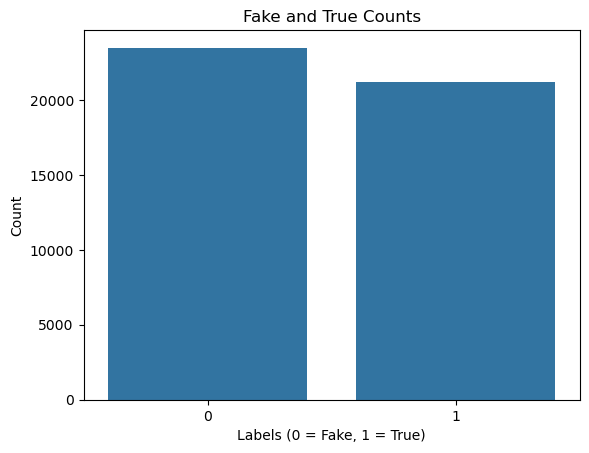

In [7]:
sns.countplot(data=df,x='label')
plt.title("Fake and True Counts")
plt.xlabel("Labels (0 = Fake, 1 = True)")
plt.ylabel("Count")
plt.savefig('label_distribution.png')
plt.show()


### Class Distribution

The graph above shows an approximately balanced distribution between True and Fake news articles.  
This balance is beneficial for model training, as it reduces the risk of bias toward one class and allows the model to learn features for both classes more effectively.


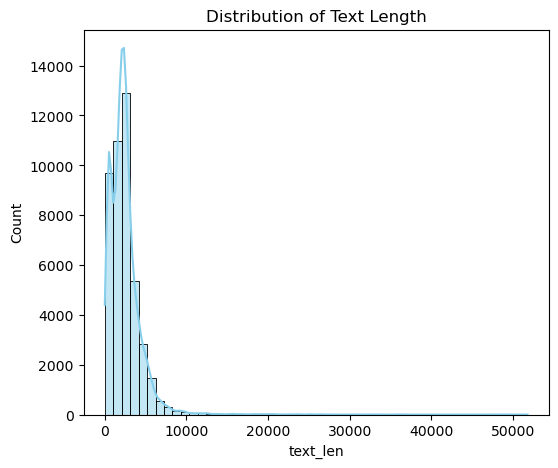

In [8]:
# Distribution of text_len
plt.figure(figsize=(6,5))
sns.histplot(df['text_len'], bins=50, kde=True, color='skyblue')
plt.title('Distribution of Text Length')
plt.savefig("text_length_distribution.png", dpi=300)
plt.show()







### Text Length Distribution

The histogram is right-skewed, indicating that most articles are relatively short.  
The majority of articles have a length between **0 and 5,000 characters**.  
Only a small number of articles exceed **25,000–50,000 characters**, and there are very few extreme cases with lengths above **80,000 characters**.


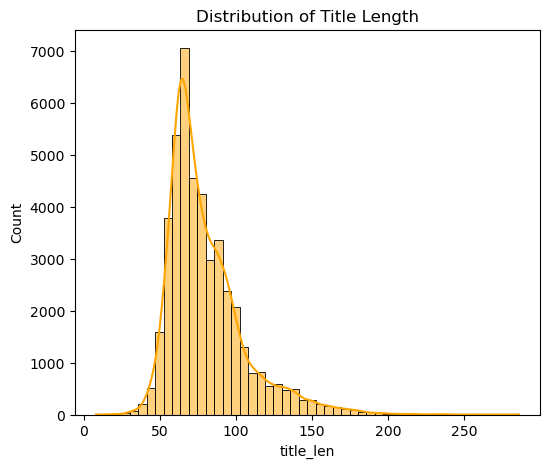

In [9]:
# Distribution of title_len
plt.figure(figsize=(6,5))
sns.histplot(df['title_len'], bins=50, kde=True, color='orange')
plt.title('Distribution of Title Length')
plt.savefig("title_length_distribution.png", dpi=300)
plt.show()

### Title Length Distribution

This histogram shows how title length is distributed in the dataset.  
Most titles have a length between **40 and 110 characters**.  
Very short titles and very long titles are rare, appearing only occasionally in the data.


/var/folders/8n/ybp5gv0n715b8994769t9_f00000gn/T/ipykernel_5136/101567161.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='text_len', data=df, palette='Set2')


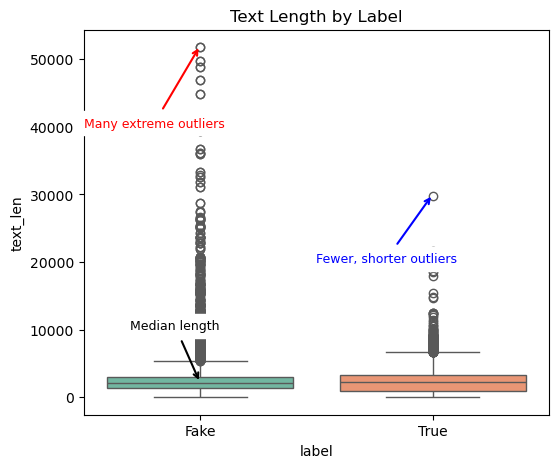

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(6,5))
sns.boxplot(x='label', y='text_len', data=df, palette='Set2')

# Set labels
plt.xticks([0, 1], ['Fake', 'True'])
plt.title('Text Length by Label')

# Annotate median
plt.annotate('Median length', xy=(0, df[df['label']==0]['text_len'].median()),
             xytext=(-0.3, 10000),
             arrowprops=dict(arrowstyle='->', color='black', lw=1.5),
             fontsize=9, backgroundcolor='white')

# Annotate outliers for Fake
plt.annotate('Many extreme outliers',
             xy=(0, 52000),
             xytext=(-0.5, 40000),
             arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
             fontsize=9, color='red', backgroundcolor='white')

# Annotate outliers for True
plt.annotate('Fewer, shorter outliers',
             xy=(1, 30000),
             xytext=(0.5, 20000),
             arrowprops=dict(arrowstyle='->', color='blue', lw=1.5),
             fontsize=9, color='blue', backgroundcolor='white')

plt.savefig("text_length_by_label_annotated.png", dpi=300, bbox_inches='tight')
plt.show()


### Text Length Analysis
The median text length is quite similar for both Fake and True news.  
However, I noticed an unusual pattern in the outliers.  

From this plot, I can see that Fake news has a lot of lengthy articles compared to True news.  
This could be due to issues like copied content, repeated text, or formatting problems.  
In fact, Fake news even contains articles with lengths over **40,000 characters**, which is something I do not see in True news.


/var/folders/8n/ybp5gv0n715b8994769t9_f00000gn/T/ipykernel_5136/4269759027.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='label', y='title_len', data=df, palette='Set2')


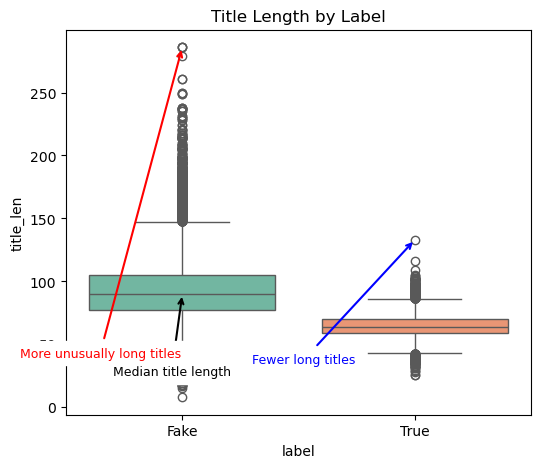

In [11]:
plt.figure(figsize=(6,5))
sns.boxplot(x='label', y='title_len', data=df, palette='Set2')

# Set labels
plt.xticks([0, 1], ['Fake', 'True'])
plt.title('Title Length by Label')

# Annotate median
plt.annotate('Median title length', 
             xy=(0, df[df['label']==0]['title_len'].median()),
             xytext=(-0.3, 25),
             arrowprops=dict(arrowstyle='->', color='black', lw=1.5),
             fontsize=9, backgroundcolor='white')

# Annotate outliers for Fake
plt.annotate('More unusually long titles',
             xy=(0, df[df['label']==0]['title_len'].max()),
             xytext=(-0.7, 40),
             arrowprops=dict(arrowstyle='->', color='red', lw=1.5),
             fontsize=9, color='red', backgroundcolor='white')

# Annotate outliers for True
plt.annotate('Fewer long titles',
             xy=(1, df[df['label']==1]['title_len'].max()),
             xytext=(0.3, 35),
             arrowprops=dict(arrowstyle='->', color='blue', lw=1.5),
             fontsize=9, color='blue', backgroundcolor='white')

plt.savefig("title_length_by_label_annotated.png", dpi=300, bbox_inches='tight')
plt.show()


### Title Length Analysis

The distribution of title length shows a similar overall pattern to that of text length.  
However, unlike text length, the **median** and **quartile ranges** for Fake and True news differ noticeably.  

- **Fake news**: Generally has longer titles, with a higher median and wider spread.  
- **True news**: Titles tend to be shorter on average, with a narrower interquartile range.  

This difference suggests that **title length** could be a useful feature for distinguishing between Fake and True news in classification models.


In [12]:
import re

# Define the regex pattern for Month day, Year (e.g., Feb 19, 2017 or February 13, 2017)
pattern = re.compile(r"^[A-Za-z]{3,9} \d{1,2}, \d{4}$")

# Keep only rows matching the pattern
df = df[df['date'].str.strip().apply(lambda x: bool(pattern.match(x)))]

# Reset index after dropping rows
df = df.reset_index(drop=True)

#Dropped the non-MMDDYYY format




<Axes: xlabel='year', ylabel='count'>

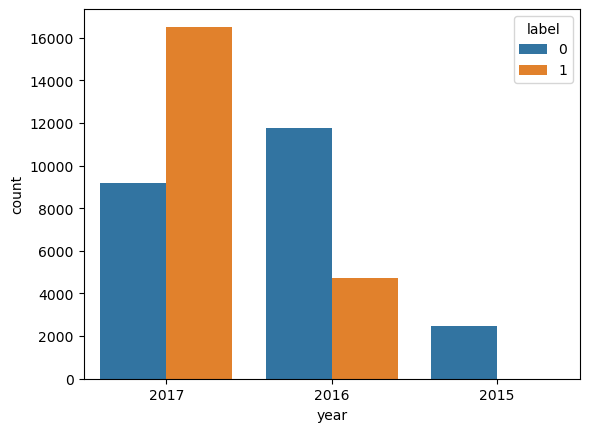

In [13]:
df["year"] = df["date"].str.split().str[-1]
df.head()
x = df["year"]
sns.countplot(x=x,hue="label",data=df)

### Year Column Analysis

From the count plot above, we observe:

- **2015**: Contains only Fake news articles — no True news entries.  
- **2016**: Fake news still dominates the year, with relatively few True news articles.  
- **2017**: The situation reverses, with True news being the majority.  

This imbalance indicates a **strong correlation between the year and the label**.  
If we keep the `year` column as a feature, the model could exploit this relationship instead of learning from the actual news content. For example:  

- If `year = 2015` → Predict Fake news.  
- If `year = 2016` → Most likely Fake news.  
- If `year = 2017` → Most likely True news.  

Such behavior is a form of **data leakage**, as it relies on dataset-specific temporal bias rather than genuine predictive patterns.

**Conclusion:**  
We will drop the `year` column from the dataset before model training to prevent leakage and ensure the model focuses on content-based features.


In [14]:
df.drop(["date", "year"], axis=1, inplace=True)
df.head()

,title,text,subject,label,title_len,text_len
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,0,89,1028
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,1,55,4820
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,1,64,1848
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,0,89,1244
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,1,55,3137


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/haseebsagheer/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


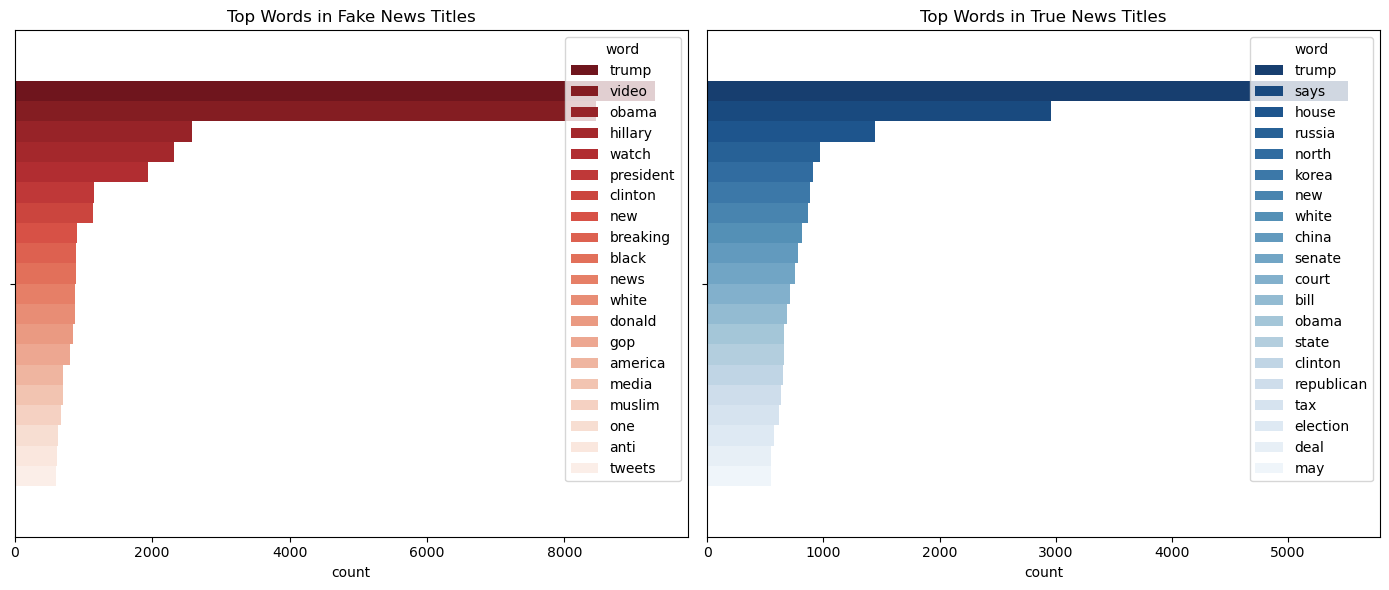

In [15]:
from collections import Counter
import re
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

def get_top_words(texts, n=20):
    words = ' '.join(texts).lower()
    words = re.findall(r'\b[a-z]{3,}\b', words)
    words = [w for w in words if w not in stop_words]
    return Counter(words).most_common(n)

top_fake_words = get_top_words(df[df['label']==0]['title'])
top_true_words = get_top_words(df[df['label']==1]['title'])

fake_df_words = pd.DataFrame(top_fake_words, columns=['word', 'count'])
true_df_words = pd.DataFrame(top_true_words, columns=['word', 'count'])

fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.barplot(x='count', hue='word', data=fake_df_words, ax=axes[0], palette='Reds_r')
axes[0].set_title('Top Words in Fake News Titles')

sns.barplot(x='count', hue='word', data=true_df_words, ax=axes[1], palette='Blues_r')
axes[1].set_title('Top Words in True News Titles')
plt.tight_layout()
plt.show()


### Top Words in Fake vs True News Titles
This plot shows the most frequent words in the titles of Fake news (left) and True news (right).

From the Fake news side, I notice that the most common word is **"trump"**, followed by terms like **"video"**, **"obama"**, **"hillary"**, and **"watch"**.  
Many of these words are either political names or attention-grabbing terms such as "breaking" and "watch", which makes me think these titles are often designed to be sensational or emotionally charged. I also see words like **"muslim"**, **"anti"**, and **"tweets"**, which might indicate topics that stir strong opinions.

On the True news side, **"trump"** is still the most frequent word, but the rest of the list is quite different. I see words like **"says"**, **"house"**, **"russia"**, **"north"**, and **"korea"**, which feel more like straightforward reporting and international political coverage. Words such as **"senate"**, **"court"**, **"bill"**, and **"tax"** suggest a focus on government and policy.

From this comparison, I can say that while both Fake and True news talk about similar topics, the vocabulary around those topics is different. Fake news titles seem more sensational, while True news titles seem more formal and fact-based. This difference in word usage could be very useful for my classification model.


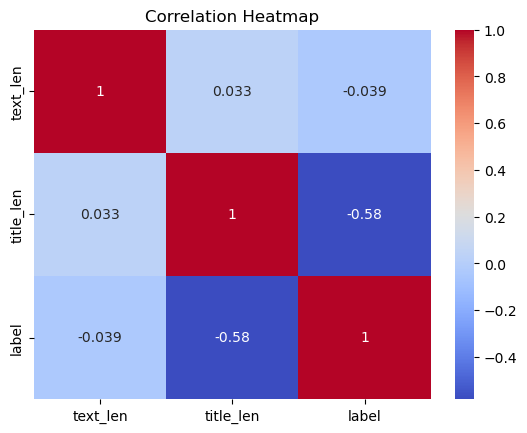

In [16]:
sns.heatmap(df[['text_len', 'title_len', 'label']].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


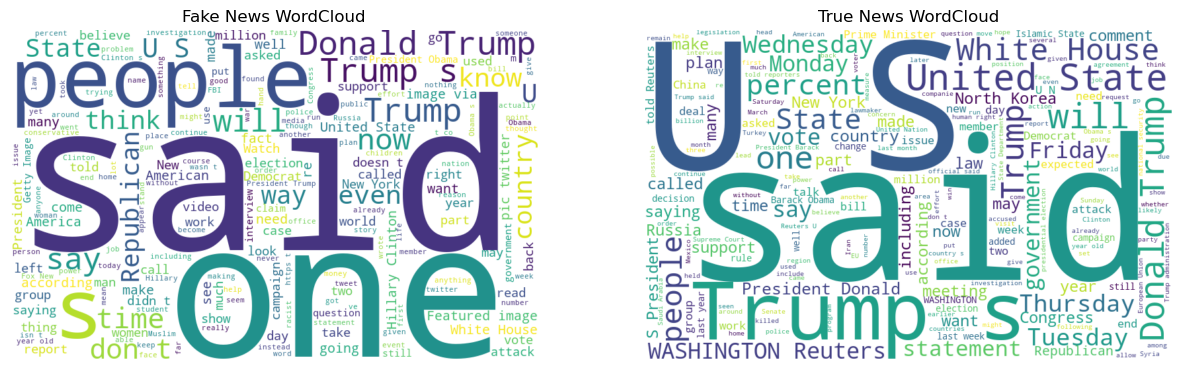

In [17]:
from wordcloud import WordCloud

fake_text = ' '.join(df[df['label']==0]['text'])
true_text = ' '.join(df[df['label']==1]['text'])

fig, axes = plt.subplots(1, 2, figsize=(15, 7))

wc_fake = WordCloud(width=800, height=500, background_color='white').generate(fake_text)
wc_true = WordCloud(width=800, height=500, background_color='white').generate(true_text)

axes[0].imshow(wc_fake, interpolation='bilinear')
axes[0].set_title('Fake News WordCloud')
axes[0].axis('off')

axes[1].imshow(wc_true, interpolation='bilinear')
axes[1].set_title('True News WordCloud')
axes[1].axis('off')

plt.show()


### WordCloud Analysis – Fake vs True News

These WordClouds show the most common words found in the text of Fake news (left) and True news (right).  
The larger the word, the more often it appears in the dataset.

From the Fake news WordCloud, I see that the biggest words are **"said"**, **"people"**, **"one"**, and **"Trump"**.  
There are also a lot of political names like **"Hillary"**, **"Obama"**, and **"Republican"**, as well as more emotional or casual words such as *"think"*, *"don’t"*, and *"will"*.  
Some words like **"muslim"** or **"attack"** seem targeted toward triggering strong emotional reactions, which makes me think these articles might be more sensational in tone.

In the True news WordCloud, I notice that **"said"** is still very common, but there’s more emphasis on official terms like **"U.S."**, **"United"**, **"State"**, **"White House"**, and **"government"**.  
I also see many references to dates and locations such as **"Washington"**, **"Friday"**, **"Tuesday"**, and **"Wednesday"**, which suggests event-based, factual reporting.  
Words like **"vote"**, **"law"**, and **"report"** point toward a more formal, structured writing style.

From this comparison, I can say that while both Fake and True news discuss similar political topics, the way they are framed is different.  
Fake news tends to use more emotional and informal language, while True news leans toward official, event-focused wording.  
This difference in language style could be very useful for my classification model.



## EDA Summary

I performed an extensive Exploratory Data Analysis (EDA) on the Fake and True news dataset.  
Here are my key observations:

- **Class Balance**: The dataset is well-balanced between Fake and True news, which is good for model training as it reduces bias toward one class.
- **Year Column**: I found that certain years are dominated by one label (e.g., 2015 only has Fake news, 2017 mostly True news). Keeping `year` could cause data leakage, so I will drop it for modeling.
- **Date Patterns**: While the date is useful for EDA, it will not be included in training due to temporal bias.  
- **Text Length**: Median lengths for Fake and True news are similar, but Fake news has many extreme outliers with unusually long articles (possibly due to copied or repeated content).
- **Title Length**: Fake news generally has longer titles compared to True news, with a noticeable difference in median and quartiles. This could be a useful feature for classification.
- **Length Distributions**: Both text and title lengths are right-skewed, meaning most articles are short, and very long ones are rare.
- **Top Words in Titles**: Fake news titles tend to have more sensational and emotionally charged words, while True news titles are more formal and fact-based.
- **WordClouds**: Similar topics appear in both Fake and True news, but Fake news uses more informal and provocative language, whereas True news contains more official terms and event-based references.
- **Correlation Heatmap**: Title length has a moderate negative correlation with the label (longer titles more common in Fake news). Text length shows very weak correlation but might still be useful in non-linear models.

**Conclusion**:  
From this EDA, I identified several potential features for classification:
- `title_len` is likely useful.
- `text_len` will be kept initially and evaluated for importance.
- Text-based features (words, n-grams, TF-IDF, etc.) will be crucial for the model.
- `year` and raw `date` will be excluded from training to avoid leakage.

This EDA also provided valuable insights into content patterns, writing styles, and data distributions that can guide both preprocessing and feature engineering in the next steps.


In [18]:
df.to_csv("EDA_Processed_Data.csv")
print(df.head())

                                               title  \
0  Ben Stein Calls Out 9th Circuit Court: Committ...   
1  Trump drops Steve Bannon from National Securit...   
2  Puerto Rico expects U.S. to lift Jones Act shi...   
3   OOPS: Trump Just Accidentally Confirmed He Le...   
4  Donald Trump heads for Scotland to reopen a go...   

                                                text       subject  label  \
0  21st Century Wire says Ben Stein, reputable pr...       US_News      0   
1  WASHINGTON (Reuters) - U.S. President Donald T...  politicsNews      1   
2  (Reuters) - Puerto Rico Governor Ricardo Rosse...  politicsNews      1   
3  On Monday, Donald Trump once again embarrassed...          News      0   
4  GLASGOW, Scotland (Reuters) - Most U.S. presid...  politicsNews      1   

   title_len  text_len  
0         89      1028  
1         55      4820  
2         64      1848  
3         89      1244  
4         55      3137  
